# 07 - Teste de Hipóteses

Nessa aula, iremos tratar dos seguintes conteúdos:

- Teste de Hipóteses
- Valor p
- Comparação entre duas médias

## 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# função para calcular a probabilidade a partir do Z Score
import scipy.stats as st

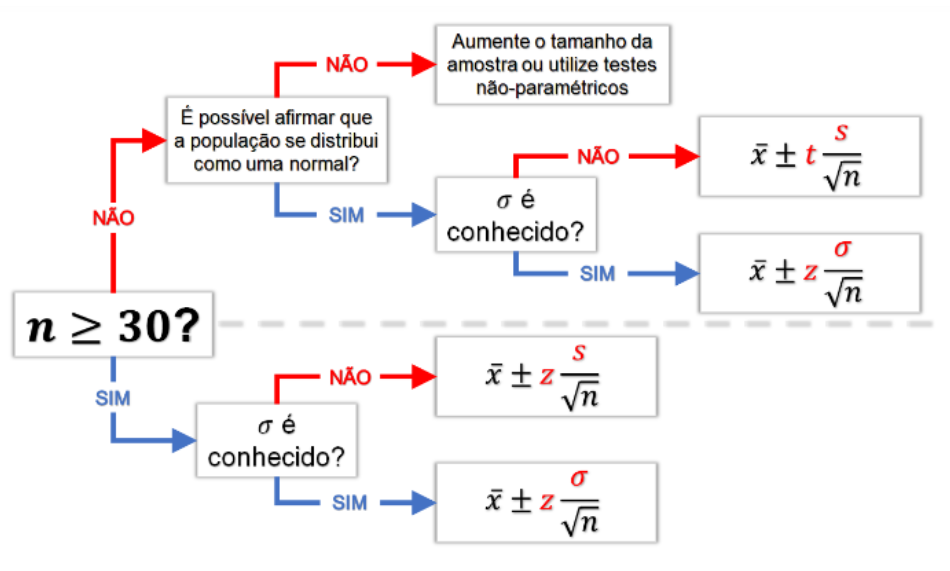

## 

## Teste de Hipóteses

O __Teste de Hipóteses__ é a principal ferramenta para tirarmos conclusões a partir de uma dada amostra e extrapolar (ou inferir) conclusões sobre a população. Uma hipótese será uma declaração sobre um parâmetro da população, ou seja para dado $\mu$, $\sigma^2$ e $p$ da população usaremos estimadores como $\overline{X}$, $S^2$ e $\hat{p}$ para as amostras. Os cálculos desses estimadores são dados da seguinte forma:

$$\overline{X} = \sum_{i = 1}^{n} \frac{X_{i}}{n}$$

<br>

$$ S^{2}  = \frac{1}{n - 1} \sum_{i = 1}^{n} (X_{i} - \overline{X})^2$$

<br>

$$ \hat{p} = \frac{1}{n} \sum_{i = 1}^{n} I_{i} $$

No caso para a proporção $\hat{p}$, o valor de $I_{i}$ é igual a 1 se a observação tem a característica de interesse, ou seja $I_{i} \in \{0, 1\}$

<br>

Quando vamos aplicar o teste de hipóteses queremos testar alguma informação relevante sobre um atributo da população, de maneira a aceitar ou rejeitar esta informação. Para isto é que formulamos as chamadas __hipótese nula__ ($ H_{0}$) e a __hipótese alternativa__ ($H_{a}$ ou $H_{1}$), sendo a hipótese alternativa normalmente a rejeição da hipótese nula.

Ao testar essas hipóteses podemos cair nos seguintes casos:



| Hipóteses | $H_{0}$ é verdadeira | $H_{0}$ é falsa |
|-----------|----------------------|-----------------|
| Rejeitar $H_{0}$ | Erro tipo I ($\alpha$) | Sem erro |
| Aceitar $H_{0}$  | Sem erro | Erro tipo II ($\beta$) |

<br>

Partindo para as distribuições podemos interpretar cada um dos erros também como a figura a seguir:

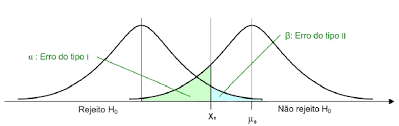

<br>

Usualmente aplicamos teste de hipótese para diminuir a chance de ocorre o erro do Tipo I, ou seja costuma-se trabalhar com o nível de significância $\alpha$.

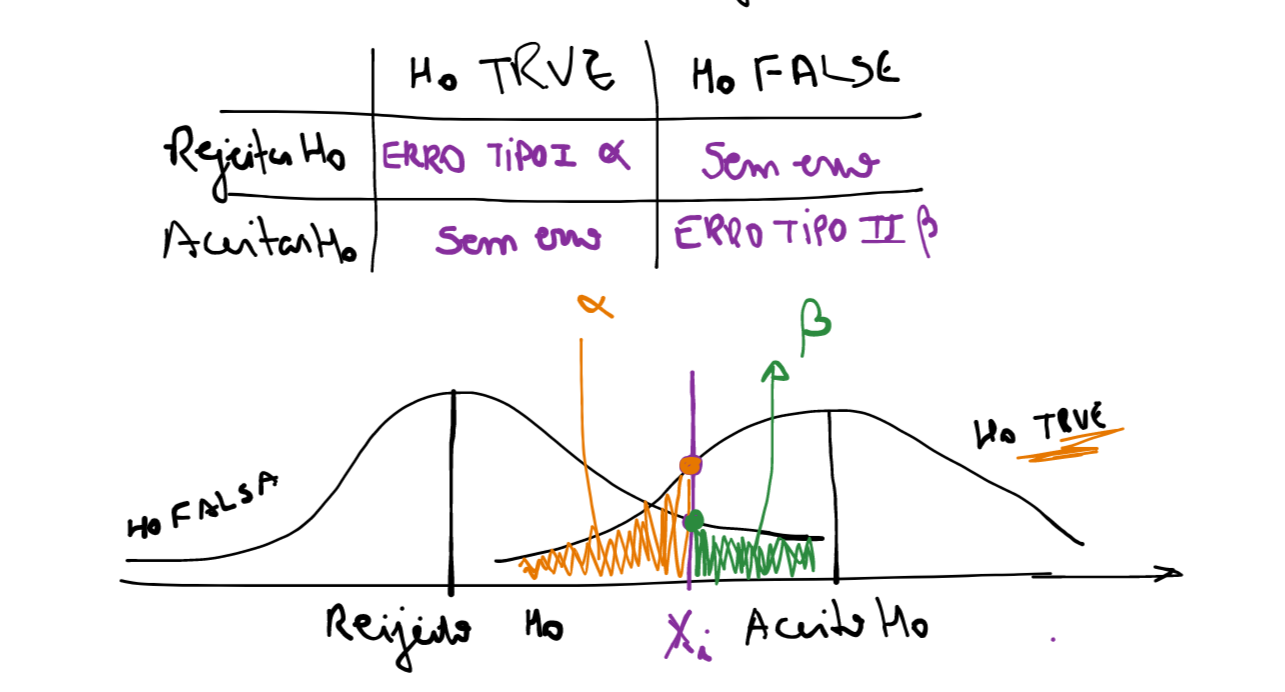

**Exemplo 1**: Uma fábrica anuncia que o índice de nicotina dos cigarros de uma dada marca é igual a 20 mg por cigarro. Um laboratório realiza 20 análises do índice obtendo: 22, 19, 21, 22, 20, 18, 27, 20, 21, 19, 20, 22, 17, 20, 21,18, 25, 16, 20, 21. Sabe-se que o índice de nicotina dos cigarros dessa marca se distribui normalmente com variância 4 mg$^2$. Pode-se aceitar a afirmação do fabricante, ao nível de 5%?

$H_0: \mu = 20$<br>
$H_1: \mu > 20$

### Resolução Teórica:

Vamos calcular o valor crítico para o teste e assim conseguir saber se aceitamos ou rejeitamos $H_{0}$:

$$ P\left(Z <\frac{\overline{X}_{c} - \mu}{\frac{\sigma}{\sqrt{n}}} | \mu =20 \right) = 1 - \alpha =  0.95 $$

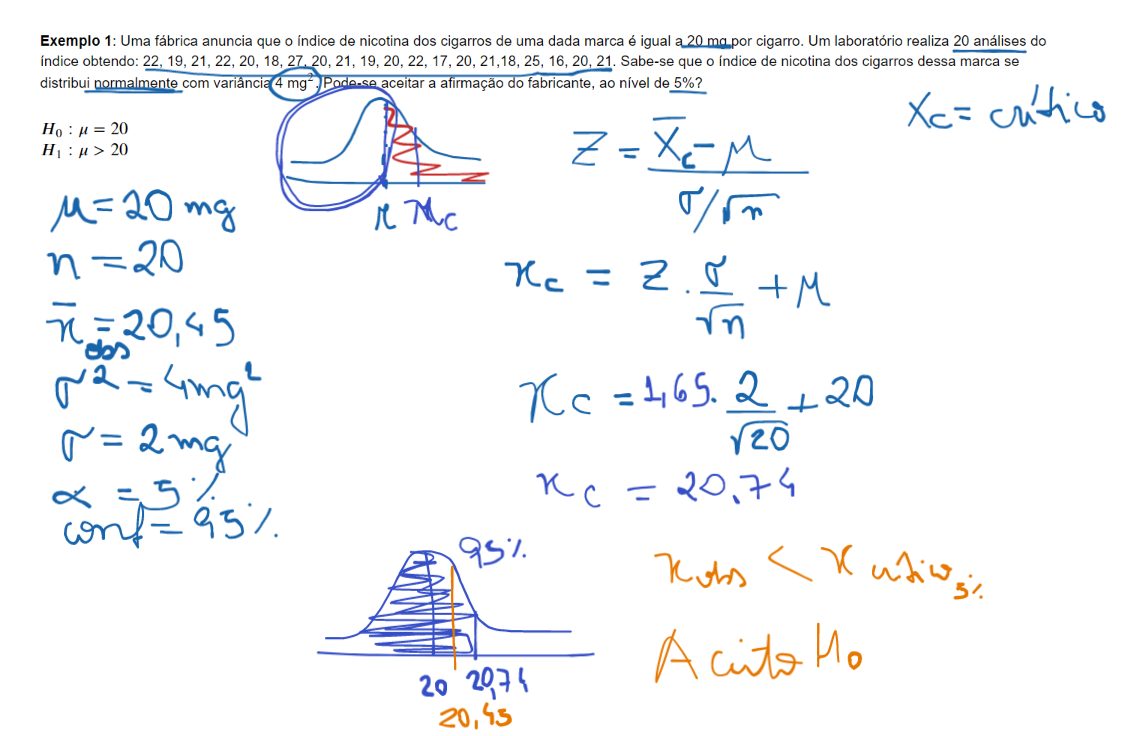

In [5]:
# Calculo da probabilidade
prob = st.norm.ppf(0.95)
print("Probabilidade para 95%: ", prob)

# Parametros para o teste
mu = 20

sigma = np.sqrt(4)

n = 20

# Calculo do valor critico
Xc = mu + (sigma/np.sqrt(n))*prob
print("Valor crítico: ", Xc, " mg")

# Aplicando as observações
X = [22, 19, 21, 22, 20, 18, 27, 20, 21, 19,
     20, 22, 17, 20, 21, 18, 25, 16, 20, 21]

Xobs = np.mean(X)

print("Valor médio observado: ", Xobs, " mg")

# verificando o teste
print("Teste de Hipótese: ")
if(Xobs < Xc):
    print("Aceitamos H0")
else:
    print("Rejeitamos H0")

Probabilidade para 95%:  1.6448536269514722
Valor crítico:  20.735600904580114  mg
Valor médio observado:  20.45  mg
Teste de Hipótese: 
Aceitamos H0


### Resolução por Simulação:

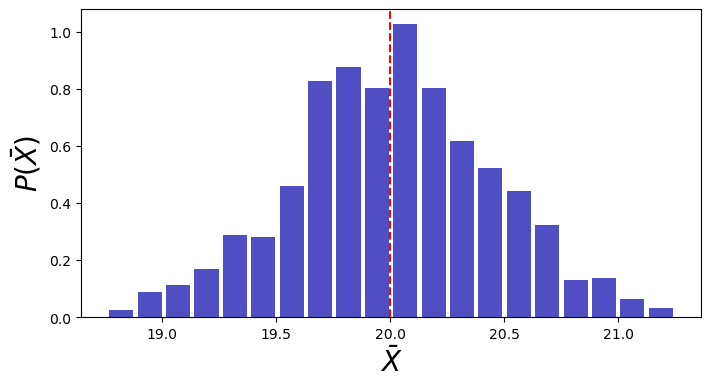

In [6]:
# media
mu = 20

# desvio padrao
sigma = 2

# tamanho da amostra
n = 20

# numero de simulações
Ns = 1000

# Vetor para as medias amostrais
Xm = []

# Loop paragerar as medias
for s in range(1, Ns):
    x = np.random.normal(mu, sigma, n)  # sorteia uma amostra de tamanho n
    Xm.append(np.mean(x))

# Plot da figura
plt.figure(figsize=(8, 4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7,
             rwidth=0.85, label=str(Ns), density=True)
plt.axvline(x=mu, color='r', linestyle='--', label='Media')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show()

Depois de gerar as amostras, vamos verificar a fração de observações que permitem que aceitemos $H_0$:

In [7]:
# Valores observados
X = [22, 19, 21, 22, 20, 18, 27, 20, 21, 19,
     20, 22, 17, 20, 21, 18, 25, 16, 20, 21]
xobs = np.mean(X)

# Avaliando o teste de hipotese
alpha = 95
xc = np.percentile(Xm, alpha)
print('Xc=', xc, '  Xobs = ', xobs)
if(xobs < xc):
    print("Aceitamos H0")
else:
    print("Rejeitamos H0")

Xc= 20.737113435592462   Xobs =  20.45
Aceitamos H0


Podemos ainda ver esse resultado na figura.

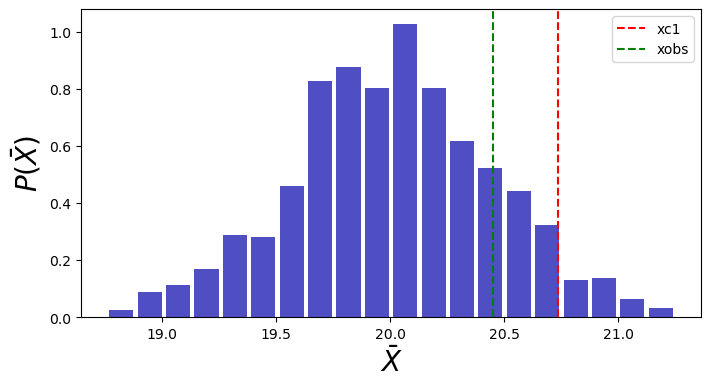

In [8]:
# plot da figura
plt.figure(figsize=(8, 4))
a = plt.hist(x=Xm, bins=20, color='#0504aa',
             alpha=0.7, rwidth=0.85, density=True)
plt.axvline(x=xc, color='red', linestyle='--', label='xc1')
plt.axvline(x=xobs, color='green', linestyle='--', label='xobs')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.legend()
plt.show()

**Exemplo 2**: Um pesquisador deseja estudar o efeito de certa substância no tempo de reação de seres vivos a um certo tipo de estímulo. Um experimento é desenvolvido com cobaias, que são inoculadas com a substância e submetidas a um estímulo elétrico, com seus tempos de reação (em segundos) anotados. Os seguintes valores foram obtidos:
T = [9.1, 9.3, 7.2, 13.3, 10.9, 7.2, 9.9, 8.0, 8.6, 7.5]<br>
Admite-se que, em geral,  o tempo de reação tem distribuição Normal com média 8 segundos e desvio padrão 2 segundos. Entretanto, o pesquisador desconfia que o tempo médio sofre alteração por influência da substância. Verifique ao nível 6% se o tempo de reação das cobaias submetidas à substância foi alterado.

$H_0: \mu = 8$<br>
$H_1: \mu \neq 8$

In [9]:
prob1 = st.norm.ppf(0.03) # calcular Z a partir da probabilidade
prob1

-1.880793608151251

In [10]:
prob2 = st.norm.ppf(0.97) # calcular Z a partir da probabilidade
prob2

1.8807936081512509

In [11]:
np.mean([9.1, 9.3, 7.2, 13.3, 10.9, 7.2, 9.9, 8.0, 8.6, 7.5])

9.1

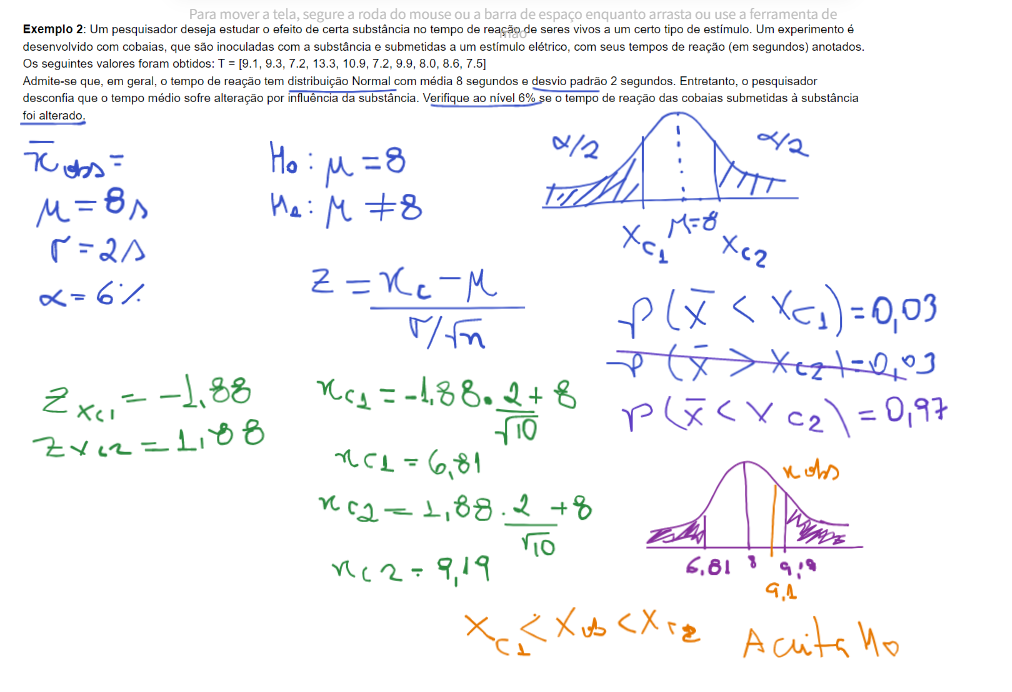

### Resolução Teórica:

Precisamos primeiramente definir a região crítica para o teste de hipótese:

$\alpha$ = P(rejeitar $H_{0}$ | $H_{0}$ é verdadeira) = 0.06, ou seja:

$$ P\left(\overline{X} < \overline{X}_{c1} \cup \overline{X} > \overline{X}_{c2} | \mu = 8 \right) = 0.06 $$

<br>

Para o caso do teste bicaudal, temos que a probabilidade para cada um dos casos será igual a $\alpha/2$:

$$ P\left(\overline{X} < \overline{X}_{c1} | \mu = 8 \right) = 0.03 $$

$$ P\left(\overline{X} > \overline{X}_{c2} | \mu = 8 \right) = 0.03 $$

<br>

Por fim ajustando a probabilidade para o caso crítico 2:

$$ P\left(\overline{X} < \overline{X}_{c1} | \mu = 8 \right) = 0.03 $$

$$ P\left(\overline{X} < \overline{X}_{c2} | \mu = 8 \right) = 0.97 $$


In [12]:
# nivel de significancia
alpha = 0.06

#Caso critico 1
print("Caso crítico 1")

# Calculo da probabilidade 1
prob1 = st.norm.ppf(alpha/2)
print("Probabilidade caso crítico 1: ", prob1)

# Parametros do enunciado
mu = 8
sigma = 2
n = 10

# Valor critico 1
Xc1 = mu + (sigma/np.sqrt(n))*prob1
print("Valor crítico 1: ", Xc1, " s")
print("==================================================")

#Caso critico 2
print("Caso crítico 2")

# Probabilidade 2
prob2 = st.norm.ppf(1 - alpha/2)
print("Probabilidade caso crítico 2: ", prob2)

# valor critico 2
Xc2 = mu + (sigma/np.sqrt(n))*prob2
print("Valor crítico 2: ", Xc2, " s")
print("==================================================")

# Valores observados
X = [9.1, 9.3, 7.2, 13.3, 10.9, 7.2, 9.9, 8.0, 8.6, 7.5]

# Valor medio das observações
Xobs = np.mean(X)
print("Valor médio observado: ", Xobs, " s")

# teste de Hipoteses
print("Teste de Hipótese: ")
if(Xobs < Xc1 or Xobs > Xc2):
    print("Rejeitamos H0")
else:
    print("Aceitamos H0")

Caso crítico 1
Probabilidade caso crítico 1:  -1.880793608151251
Valor crítico 1:  6.810481677911164  s
Caso crítico 2
Probabilidade caso crítico 2:  1.8807936081512509
Valor crítico 2:  9.189518322088837  s
Valor médio observado:  9.1  s
Teste de Hipótese: 
Aceitamos H0


### Resolução por Simulação:

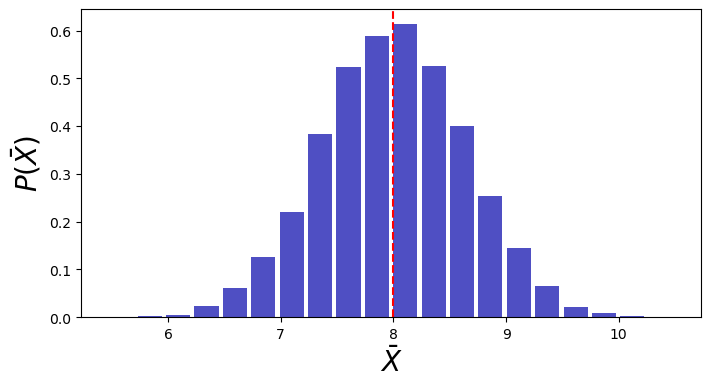

In [13]:
# PArametros
# media
mu = 8

# desvio padrao
sigma = 2

# tamanho da amostra
n = 10

# numero de simulações
Ns = 10000

# Vetor para as medias amostrais
Xm = []

# Loop das simulações
for s in range(1,Ns):
    x = np.random.normal(mu, sigma, n) # sorteia uma amostra de tamanho n
    Xm.append(np.mean(x))
    
# Plot do Histograma
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, label = str(Ns), density=True)
plt.axvline(x=mu, color='r', linestyle='--', label = 'Media')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show()  

In [14]:
# Observações
X = [9.1,9.3,7.2,13.3,10.9,7.2,9.9,8.0,8.6,7.5]
xobs = np.mean(X)

# teste de Hipotese
alpha = 3
xc1 = np.percentile(Xm, alpha)
xc2 = np.percentile(Xm, 100-alpha)
print('Xc1=',xc1, '  Xc2=', xc2, '  Xobs = ', xobs)
if(xobs < xc1 or xobs > xc2):
    print("Rejeitamos H0")
else:
    print("Aceitamos H0")

Xc1= 6.802988558510765   Xc2= 9.197153337974553   Xobs =  9.1
Aceitamos H0


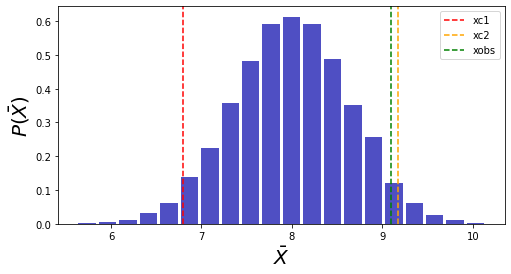

In [16]:
# Figura com os valores
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, density=True)
plt.axvline(x=xc1, color='red', linestyle='--', label = 'xc1')
plt.axvline(x=xc2, color='orange', linestyle='--', label = 'xc2')
plt.axvline(x=xobs, color='green', linestyle='--', label = 'xobs')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.legend()
plt.show() 

### Teste bicaudal vs unicaudal


<img src="https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img002.png" weight=50%>

## 

## Valor p

Nos casos anteriores, o que fizemos para realizar o teste foi fixar a probabilidade do erro tipo I, dessa forma a aceitação ou não de $H_{0}$ depende do valor de $\alpha$.

Uma outra forma de realizarmos o teste será __calculando a probabilidade de significância__ (nível descritivo) mais conhecido como __p-value__ (valor p).

A principal diferença com relação aos casos anteriores consiste em não construir a região crítica, o que se faz é indicar a probabilidade de ocorrer valores de estatística mais extremos do que o observado caso a hipótese seja verdadeira. 

O exemplo a seguir vai mostra justamente essa transição entre aceitação e rejeição da $H_{0}$:

__Exemplo:__ Vamos considerar as seguintes hipóteses:<br>

$H_0: \mu = 10$<br>
$H_1: \mu < 10$<br>

Assumimos que a população tem distribuição normal com desvio padrão $\sigma$, definido abaixo:

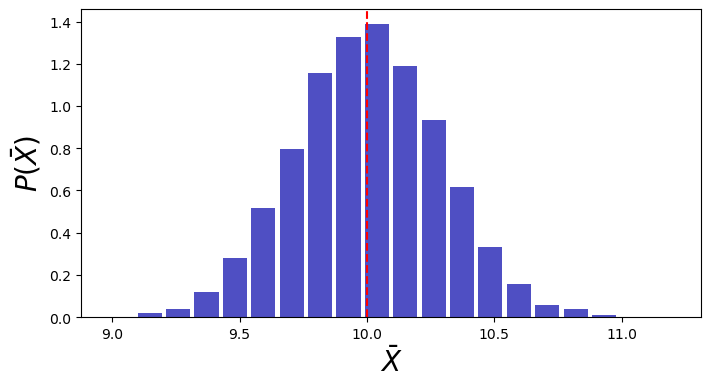

In [16]:
# PArametros
mu = 10
sigma = 2

# tamanho da amostra
n = 50

# Numero de simulações
Ns = 10000

# Vetor com as medias amostrais
Xm=[]

# Loop para as simulaçoes
for s in range(1,Ns):
    x = np.random.normal(mu, sigma, n) # sorteia uma amostra de tamanho n
    Xm.append(np.mean(x))
    
# plot do histograma
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, label = str(Ns), density=True)
plt.axvline(x=mu, color='r', linestyle='--', label = 'Media')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show()  

Vamos supor que conhecemos o valor médio observado $\bar{x}_{obs}$.

De acordo com o nível de significância, podemos aceitar ou rejeitar $H_0$, conforme veremos a seguir:

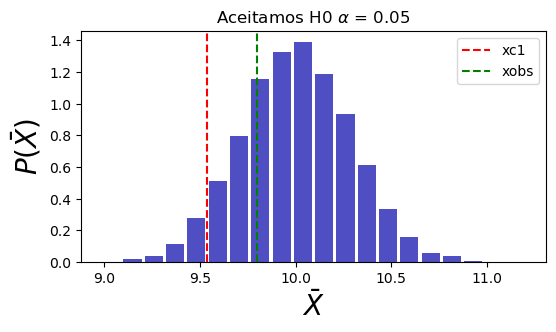

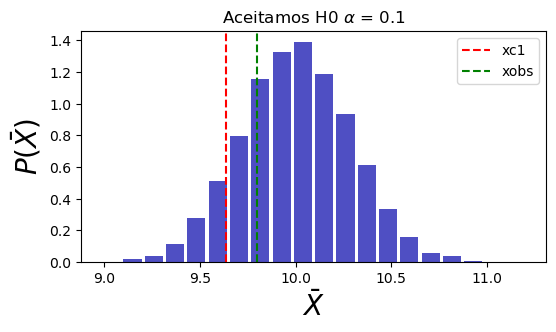

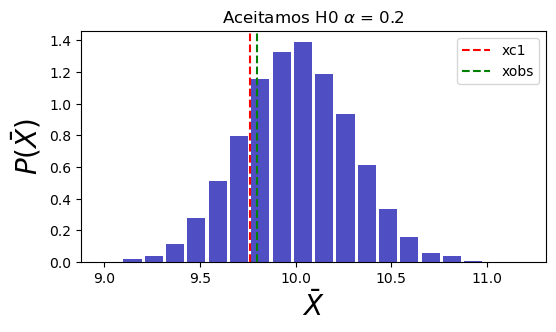

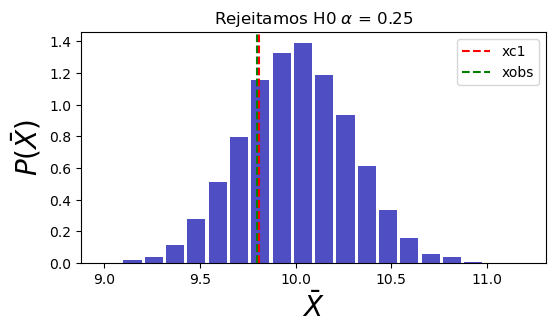

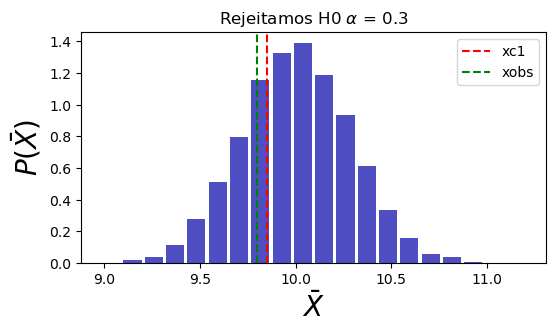

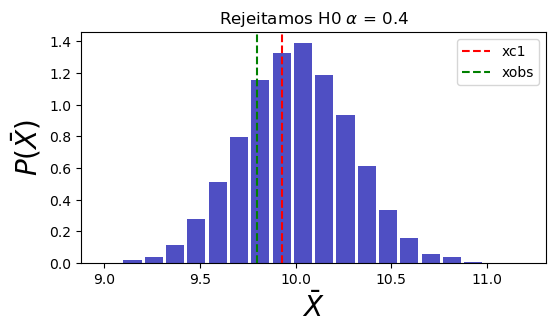

In [17]:
# Valor observado
xobs = 9.8

# Alphas a serem testados
alphas = [5, 10, 20, 25, 30, 40]

# Loop para criar um grafico para cada alpha
for alpha in alphas:
    xc = np.percentile(Xm, alpha)
    plt.figure(figsize=(6, 3))
    a = plt.hist(x=Xm, bins=20, color='#0504aa',
                 alpha=0.7, rwidth=0.85, density=True)
    plt.axvline(x=xc, color='red', linestyle='--', label='xc1')
    plt.axvline(x=xobs, color='green', linestyle='--', label='xobs')
    plt.xlabel(r'$\bar{X}$', fontsize=20)
    plt.ylabel(r'$P(\bar{X})$', fontsize=20)
    plt.legend()
    if(xobs < xc):
        plt.title("Rejeitamos H0"+r' $\alpha$ = ' + str(alpha/100))
    else:
        plt.title("Aceitamos H0"+r' $\alpha$ = ' + str(alpha/100))
    plt.show(True)

O valor de $\alpha$ em que há a transição entre aceitar ou rejeitar $H_0$ é o valor p.

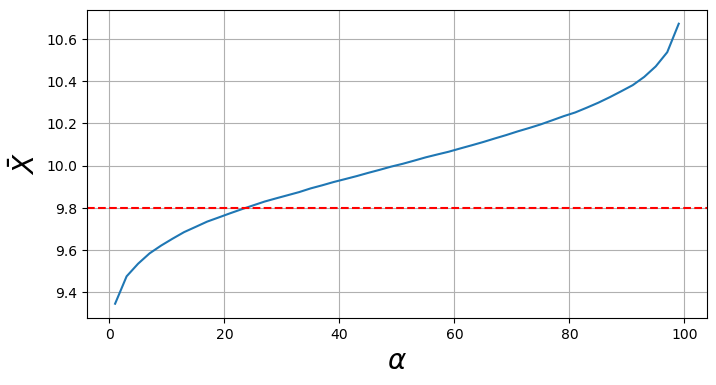

In [18]:
# Alphas e valores criticos
xobs = 9.8
xcs = []
alphas = []

# Determina os valores criticos
for alpha in np.arange(1,100,2):
    xc = np.percentile(Xm, alpha)
    xcs.append(xc)
    alphas.append(alpha)
    
# Grafico
plt.figure(figsize=(8,4))
plt.plot(alphas,xcs)
plt.axhline(y=xobs, color='r', linestyle='--', label = 'Media')
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$\bar{X}$', fontsize=20)
plt.grid()
plt.show()

Podemos calcular o valor p: $P(\bar{X} > \bar{x}_{obs}|\mu=\mu_0) = \alpha$:

In [19]:
# Inicializa o p value
pvalue = 0

# Loop para o calculo do p value
for i in range(0, len(Xm)):
    if(Xm[i] < xobs):
        pvalue = pvalue + 1
pvalue = pvalue/len(Xm)
print('P-valor: ', pvalue)

P-valor:  0.23802380238023801


Mostrando no gráfico anterior:

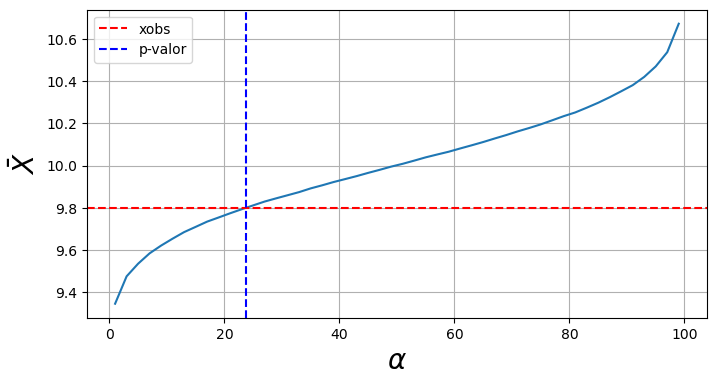

In [20]:
# Alphas e valores criticos
xobs = 9.8
xcs = []
alphas = []

# Determina os valores criticos
for alpha in np.arange(1,100,2):
    xc = np.percentile(Xm, alpha)
    xcs.append(xc)
    alphas.append(alpha)
    
# Grafico   
plt.figure(figsize=(8,4))
plt.plot(alphas,xcs)
plt.axhline(y=xobs, color='red', linestyle='--', label = 'xobs')
plt.axvline(x=pvalue*100, color='blue', linestyle='--', label = 'p-valor')
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$\bar{X}$', fontsize=20)
plt.legend()
plt.grid()
plt.show()

O que podemos concluir sobre o __valor p__ é que ele representa o __menor nível de significância $\alpha$ no qual é possível rejeitar a hipótese nula__ ou em outras palavras, a probabilidade de observar os dados se a hipótese nula for verdadeira.

Quanto melhor o valor p, maior é a evidência contra a aceitação da hipótese nula. Vamos avaliar alguns exemplos diretos:

- $p = 0.01$, significa que em 1 de cada 100 experimentos, a $H_{0}$ Será verdadeira;
- $p = 0.1$, significa que em 10 de cada 100 experimentos, a $H_{0}$ Será verdadeira;
- $p = 0.5$, significa que em 50 de cada 100 experimentos, a $H_{0}$ Será verdadeira;
- $p = 0.9$, significa que em 90 de cada 100 experimentos, a $H_{0}$ Será verdadeira.

Usualmente costuma-se avaliar o nível de significância de acordo com a tabela abaixo:

| Nível de significância | Decisão |
|------------------------|---------|
| $p < 0.01$ | Evidência muit forte contra $H_{0}$ |
| $0.01 < p < 0.05$ | Forte evidência contra $H_{0}$ |
| $0.05 < p < 0.1$ | Fraca evidência contra $H_{0}$ |
| $p > 0.1$ | Pouquíssima ou nenhuma evidência contra $H_{0}$ |

__Exemplo:__ Uma companhia de ônibus planejou uma nova rota. Um estudo preliminar afirma que a duração da viagem pode ser considerada uma variável aleatória com distribuição normal com $\mu$ = 300 minutos e $\sigma$ = 30 minutos. As 10 primeiras viagens resultaram em uma média igual a 314 minutos. Esse resultado comprova ou não o estudo preliminar?

$H_0: \mu = 300$ min<br>
$H_1: \mu > 300$ min

In [22]:
z = (314-300)/(30/np.sqrt(10))
z

1.4757295747452437

In [23]:
st.norm.cdf(z) # calcular a probabilidade a partir de z

0.9299917484014155

In [25]:
p_value = 1 - st.norm.cdf(z)
p_value

0.07000825159858448

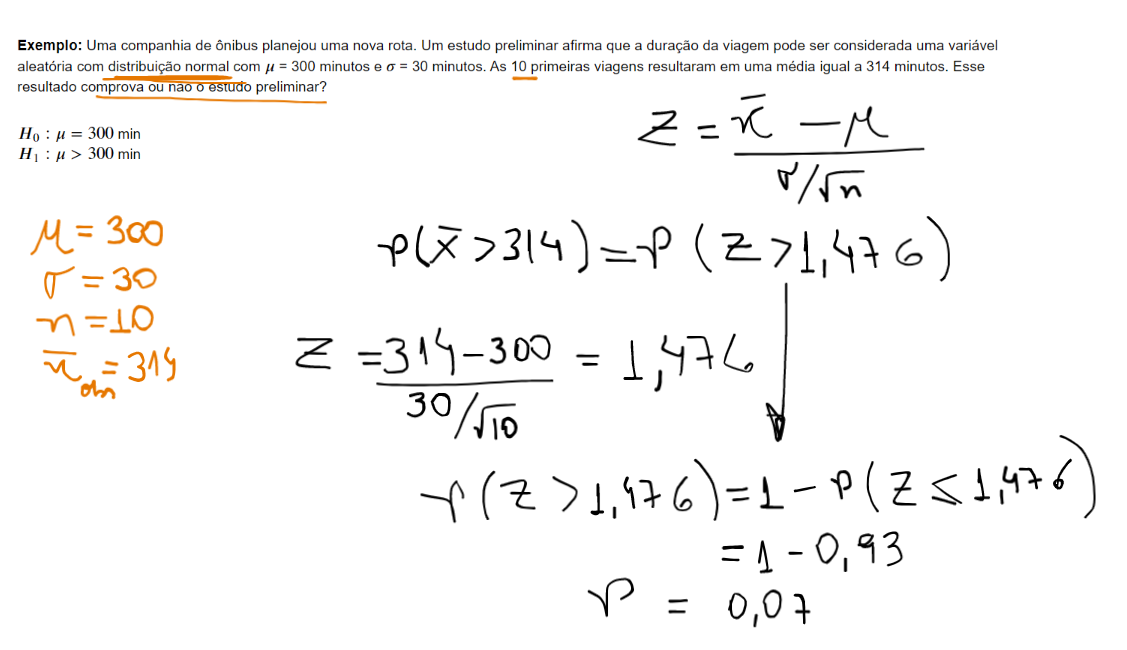

Poucas evidência para rejeitar Ho

$H_0: \mu = 300$ min<br>
$H_1: \mu > 300$ min

$$ P\left(\overline{X} > 314 | \mu = 300\right) = P\left(\frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}} > \frac{314 - \mu}{\frac{\sigma}{\sqrt{n}}}\right) = P\left(\frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}} > \frac{314 - 300}{\frac{30}{\sqrt{10}}}\right) = P(Z > 1,48)$$

Lembrando que $P(Z > 1,48) = 1 - P(Z < 1,48)$:

In [22]:
# Parametros
Xobs = 314
mu = 300
sigma = 30
n = 10

# Calculo do Z Score
z = (Xobs - mu)/(sigma/np.sqrt(n))

# Print do Z Score e da probabilidade
print('Z - Score: ', z)
print('Probabilidade: ', 1 - st.norm.cdf(z))

Z - Score:  1.4757295747452437
Probabilidade:  0.07000825159858448


Como o valor p não é tão pequeno, podemos dizer que há poucas evidências para rejeitar $H_{0}$.

## 

## Comparação entre duas médias

Uma das principais aplicações do teste de hipóteses é na seleção de atributos. Vamos comparar duas distribuições e verificar se elas possuem a mesma média. Vamos formular as hipóteses:
$$
H_0: \mu_1 = \mu_2
$$
$$
H_a: \mu_1 \neq \mu_2
$$

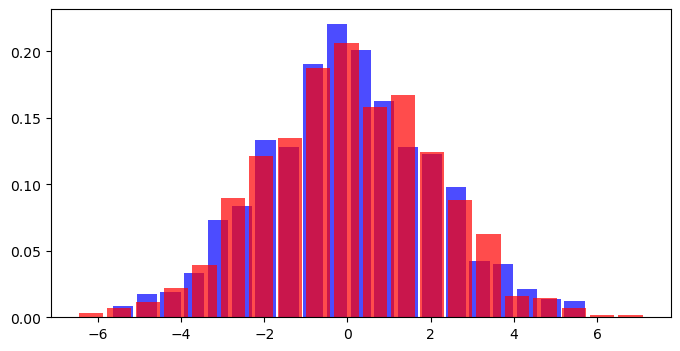

In [35]:
# Parametros para a curva 1
n = 1000
mu1 = 0
sigma1 = 2
x1 = np.random.normal(mu1, sigma1, n) # sorteia uma amostra de tamanho n

# Parametros para a curva 2
mu2 = 0
sigma2 = 2
x2 = np.random.normal(mu2, sigma2, n) # sorteia uma amostra de tamanho n

# Histograma das distribuições
plt.figure(figsize=(8,4))
a1 = plt.hist(x=x1, bins=20, color='blue', alpha=0.7, rwidth=0.85, density=True)
a2 = plt.hist(x=x2, bins=20, color='red', alpha=0.7, rwidth=0.85, density=True)
plt.show(True)  

Para resolver a comparação entre médias, a forma que vamos utilizar para fazer será com o teste [T de Student](https://pt.wikipedia.org/wiki/Teste_t_de_Student):

## Student's t-distribution

A [distribuição t de Student](https://en.wikipedia.org/wiki/Student%27s_t-distribution) é uma distribuição simétrica e semelhante à curva normal padrão, porém com caudas mais largas, ou seja, uma simulação da t de Student pode **gerar valores mais extremos** que uma simulação da normal.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Student_t_pdf.svg/325px-Student_t_pdf.svg.png">

onde $\nu$ é o número de **graus de liberdade**, comumente tomado como $n-1$ para nossos objetivos.

Note que para $\nu \rightarrow \infty$, recuperamos a distribuição normal!

In [36]:
# Import dos stats do scipy
from scipy import stats

# Aplicando o t-Student
t_stat, p = stats.ttest_ind(x1, x2)
print(f't={t_stat}, p={p}')

t=-0.41726320768583625, p=0.6765307263849376


Ou seja, como o valor p é alto, podemos concluir que as distribuições possuem a mesma média (aceitamos $H_0$)

Vamos agora considerar duas distribuições com médias distintas.

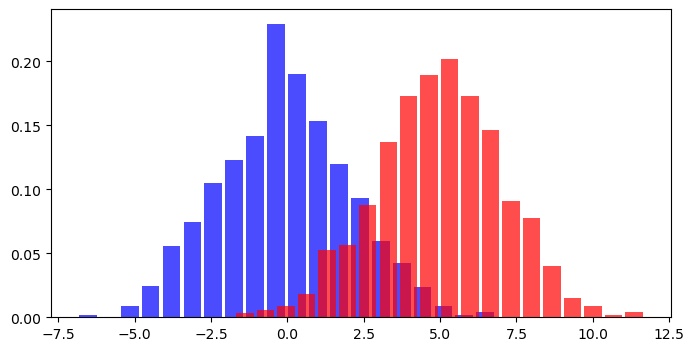

In [37]:
# PArametros da curva 1
n = 1000
mu1 = 0
sigma1 = 2
x1 = np.random.normal(mu1, sigma1, n) # sorteia uma amostra de tamanho n

# PArametros da curva 2
mu2 = 5
sigma2 = 2
x2 = np.random.normal(mu2, sigma2, n) # sorteia uma amostra de tamanho n

# Histograma das distribuições
plt.figure(figsize=(8,4))
a1 = plt.hist(x=x1, bins=20, color='blue', alpha=0.7, rwidth=0.85, density=True)
a2 = plt.hist(x=x2, bins=20, color='red', alpha=0.7, rwidth=0.85, density=True)
plt.show(True)  

In [38]:
# Calculo do t-student
t_stat, p = stats.ttest_ind(x1,x2)
print(f't={t_stat}, p={p}')

t=-54.721521488350106, p=0.0


Nesse segundo caso, vemos que o valor p é igual a zero, o que nos permite rejeitar $H_0$

Portanto, podemos usar o teste de hipóteses para realizar uma seleção de atributos, onde atributos que não conseguem discriminar duas classes, devem ser removidos do conjunto de dados.

## 

## Exercícios

__1)__ Suponha que os pesos das sacas de soja de uma indústria alimentícia se distribuem aproximadamente como uma normal de desvio padrão populacional igual a 570 g. Selecionada uma amostra aleatória de 25 sacas de um lote específico, obteve-se um peso médio de 27.215 g. Construa um intervalo de confiança para a **média populacional** assumindo um **nível de significância de 10%**.

__2)__ Um estudo a respeito do rendimento mensal dos chefes de domicílios no Brasil, determinou que o __erro máximo em relação a média seja de R$\$$ 370,00__. Sabendo que o desvio padrão populacional deste grupo de trabalhadores é de **R$\$$ 2.516,28**. Para um __nível de confiança de 99%__, qual deve ser o tamanho da amostra de nosso estudo?

__3)__ Um fabricante de lajotas de cerâmica introduz um novo material em sua fabricação e acredita que aumentará a resistência média, que é de 206 kg. A resistência das lajotas tem distribuição normal com desvio padrão de 12 kg. Retira-se uma amostra de 30 lajotas, obtendo $\overline{X}_{obs}$ = 210 kg. Ao nível de 10%, pode o fabricante aceitar que a resistência média de suas lajotas tenha aumentado?

__4)__ Uma fábrica de automóveis anuncia que seus carros consomem, em média, 11 litros por 100 km, com desvio padrão de 0,8 litro. Uma revista decide testar essa afirmação e analisa 35 carros dessa marca, obtendo 11,4 litros por 100 km, como consumo médio. Admitindo que o consumo tenha distribuição normal, ao nível de 5%, o que a revista concluirá sobre o anúncio da fábrica?

__5)__ Os novos operários de uma empresa são treinados a operarem uma máquina, cujo tempo X (em horas) de aprendizado é anotado. Observou-se que X segue de perto a distribuição normal N(25; 100). Uma nova técnica de ensino, que deve melhorar o tempo de aprendizado, foi testada em 16 novos empregados, os quais apresentaram 20.5 horas como tempo médio de aprendizado. Usando o p-valor, você diria que a nova técnica é melhor que a anterior?

## 